<a href="https://colab.research.google.com/github/cfrc2694/HEP_Exercises/blob/main/02_Jets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An introductional notebook to HEP analysis in pyroot

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
import os

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if (IN_COLAB):
  !apt -qq install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion python2.7
  if (os.path.isdir("/content/root")):
    pass
  else:
    !gdown https://drive.google.com/uc?id=1bWgcTAMG7IoyQASWwrrOQrGe4haUAo9t
    !cd /; tar xzf /content/root_for_colab.tar.gz
    !rm -rf root_for_colab.tar.gz*
  import sys
  sys.path.append("/content/root/build/")
  sys.path.append("/content/root/build/bin/")
  sys.path.append("/content/root/build/include/")
  sys.path.append("/content/root/build/lib/")

import ROOT
from ROOT import *

libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04.7).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.9).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.4).
python2.7 is already the newest version (2.7.17-1~18.04ubuntu1.6).
tar is already the newest version (1.29b-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Downloading...
From: https://drive.google.com/uc?id=1bWgcTAMG7IoyQASWwrrOQrGe4haUAo9t
To: /content/root_for_colab

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
file_name='Tracks_Clusters.root'
#f = ROOT.TFile.Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root")
if (os.path.isfile(file_name)):
    pass
else :
    !wget https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root -O Tracks_Clusters.root   
f = TFile.Open(file_name)

--2021-12-11 21:41:42--  https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root
Resolving csandova.web.cern.ch (csandova.web.cern.ch)... 188.185.124.106, 2001:1458:d00:4a::100:f0
Connecting to csandova.web.cern.ch (csandova.web.cern.ch)|188.185.124.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2227206546 (2.1G)
Saving to: ‘Tracks_Clusters.root’

Tracks_Clusters.roo 100%[===================>]   2.07G  17.8MB/s    in 2m 1s   

2021-12-11 21:43:44 (17.6 MB/s) - ‘Tracks_Clusters.root’ saved [2227206546/2227206546]



The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
tree = f.Get("JetRecoTree")
tree.Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

The next step is to extract the varibles we want from the dataset. We will explore two jet types: "Reco" (reconstructed from the calorimeter) and "Truth"(particle level). Activate "Event Weight". Create Canvas

In [4]:
canvas = TCanvas("Canvas"," ",800,600)
canvas.SetGrid()

Create histograms: Leading jet pT and all jets pT 

In [5]:
hist_leadreco_pt = TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
hist_reco_pt = TH1F("Reco-jet","Jet pT; pT(GeV);Events",50,10,200);

Loop and fill histograms

In [6]:
for event in tree:
  evtw=tree.EventWeight
  reco_R4_pt=tree.RecoJets_R4_pt
  if(reco_R4_pt.size()>0):
    hist_leadreco_pt.Fill(reco_R4_pt.at(0)/1000.,evtw)
    for j in range(reco_R4_pt.size()):
        hist_reco_pt.Fill(reco_R4_pt.at(j)/1000.,evtw)
print("Done!")

Done!


<p>Draw</p>

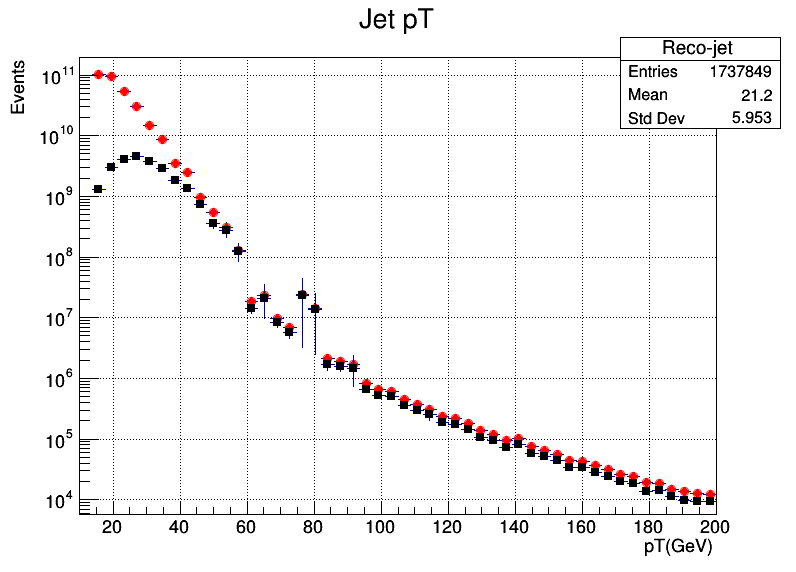

In [7]:
hist_reco_pt.SetMarkerStyle(20);
hist_reco_pt.SetMarkerColor(kRed);
hist_reco_pt.Draw("");
hist_leadreco_pt.SetMarkerStyle(21);
hist_leadreco_pt.Draw("same");
canvas.SetLogy();
canvas.Draw();

<b>Excercises: 
    1. Compare the leading truth jet pT with the leading reco jet pT, with and without event weights.
    2. Repeat for all jets pT.
</b>

Now we will study the jets pileup dependence. Plot jet pt vs. pileup

In [8]:
canvas2 = TCanvas("Canvas2","",800,600)
canvas2.SetGrid()
hist_jetpt_npv = TH2F("Reco-jet pT vs. NPV",";NPV; jet pT (GeV)",50,1,50, 20, 0, 200);
prof_jetpt_npv = TProfile("Profile Reco-jet pT vs. NPV",";NPV; jet pT (GeV)",50,1,50, 0, 200);

Fill the histograms: Make a cut to accept events with at least one jet and require the leading jet to have pT above 20 GeV

In [9]:
for event in tree:
  evtw=tree.EventWeight
  npv=tree.NPV
  reco_R4_pt=tree.RecoJets_R4_pt
  if(reco_R4_pt.size()!=0 and reco_R4_pt.at(0)>20e3):
    for j in range(reco_R4_pt.size()):
      hist_jetpt_npv.Fill(reco_R4_pt.at(j)/1000.,npv,evtw);
      prof_jetpt_npv.Fill(reco_R4_pt.at(j)/1000.,npv,evtw);
print("Done!")

Done!


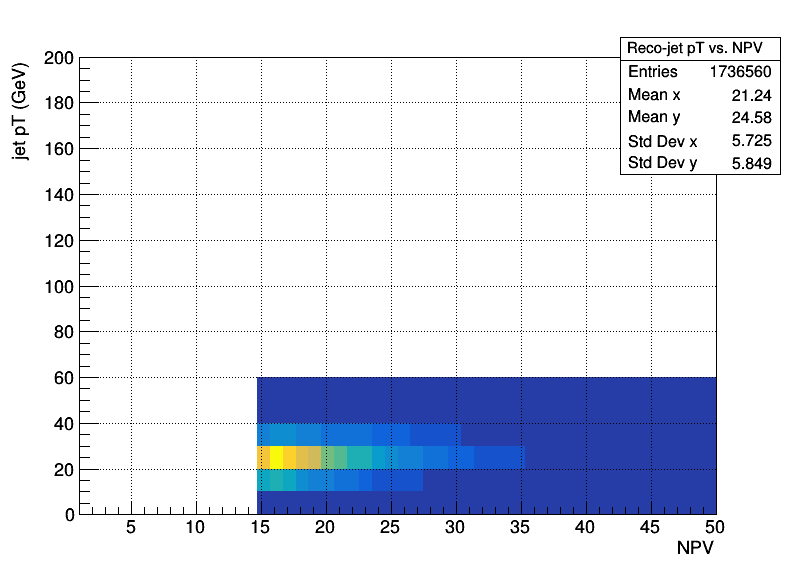

In [10]:
hist_jetpt_npv.Draw("COL")
canvas2.Draw()

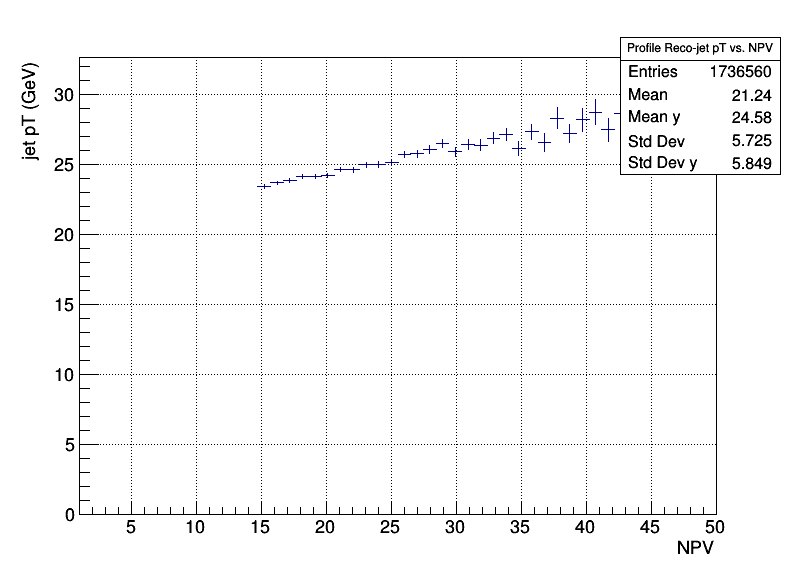

In [11]:
prof_jetpt_npv.Draw("")
canvas2.Draw()

<b>Excercise: 
3. Make plots for reco and truth jet pT vs. pileup. Interpret your results. 
</b>

Plot the JVF (Jet Vertex Fraction) variable

In [12]:
hist_leadreco_jvf = TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);
hist_leadreco100_jvf = TH1F("Lead Reco-jet100 JVF","Leading jet JVF; JVF;Events",20,-1,1);

In [13]:
for event in tree:
  evtw=tree.EventWeight
  reco_R4_pt=tree.RecoJets_R4_pt
  reco_R4_jvf=tree.RecoJets_R4_jvf
  if(reco_R4_pt.size()!=0 and reco_R4_pt.at(0)>20e3):
    hist_leadreco_jvf.Fill(reco_R4_jvf.at(0), evtw);
    if(tree.RecoJets_R4_pt.at(0)>100e3):
      hist_leadreco100_jvf.Fill(reco_R4_jvf.at(0), evtw);
print("Done!")

Done!


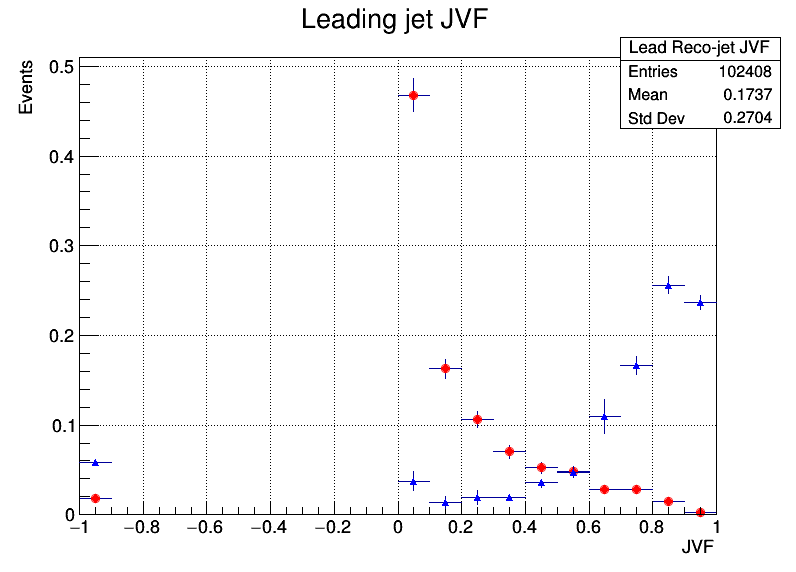

In [14]:
hist_leadreco_jvf.SetMarkerStyle(20);
hist_leadreco_jvf.SetMarkerColor(kRed);
hist_leadreco_jvf.DrawNormalized("");
hist_leadreco100_jvf.SetMarkerStyle(22);
hist_leadreco100_jvf.SetMarkerColor(kBlue);
hist_leadreco100_jvf.DrawNormalized("same");
canvas2.Draw();

<b>Excercise: 
4. Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut) 
5. Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup 
</b>

Now we will study the jet response: the ratio between the pT of the jet to the truth jet. First we should "match" the jets and the truth jets. We will use the distance DeltaR between the two, but first we should define them as four-vectors:

In [15]:
hist_DR_reco_truth = TH1F("Delta R reco","Delta R; #Delta R; Events",20,0,2);

In [16]:
for event in tree:
  evtw=tree.EventWeight
  reco_R4_pt=tree.RecoJets_R4_pt
  reco_R4_eta=tree.RecoJets_R4_eta
  reco_R4_phi=tree.RecoJets_R4_phi
  reco_R4_m=tree.RecoJets_R4_m
  reco_R4_jvf=tree.RecoJets_R4_jvf

  truth_R4_pt=tree.TruthJets_R4_pt
  truth_R4_eta=tree.TruthJets_R4_eta
  truth_R4_phi=tree.TruthJets_R4_phi
  truth_R4_m=tree.TruthJets_R4_m  
  if(truth_R4_pt.size()!=0 and truth_R4_pt.at(0)>20e3):
    truthJet = TLorentzVector()
    truthJet.SetPtEtaPhiM(
        truth_R4_pt.at(0),
        truth_R4_eta.at(0),
        truth_R4_phi.at(0),
        truth_R4_m.at(0)
    )
    if(reco_R4_pt.size()!=0 and abs(reco_R4_jvf.at(0))>0.50):
      recoJet=TLorentzVector()
      recoJet.SetPtEtaPhiM(
        reco_R4_pt.at(0),
        reco_R4_eta.at(0),
        reco_R4_phi.at(0),
        reco_R4_m.at(0)
      )
      #Plot the Delta R
      hist_DR_reco_truth.Fill(truthJet.DeltaR(recoJet),evtw);
print("Done!")


Done!


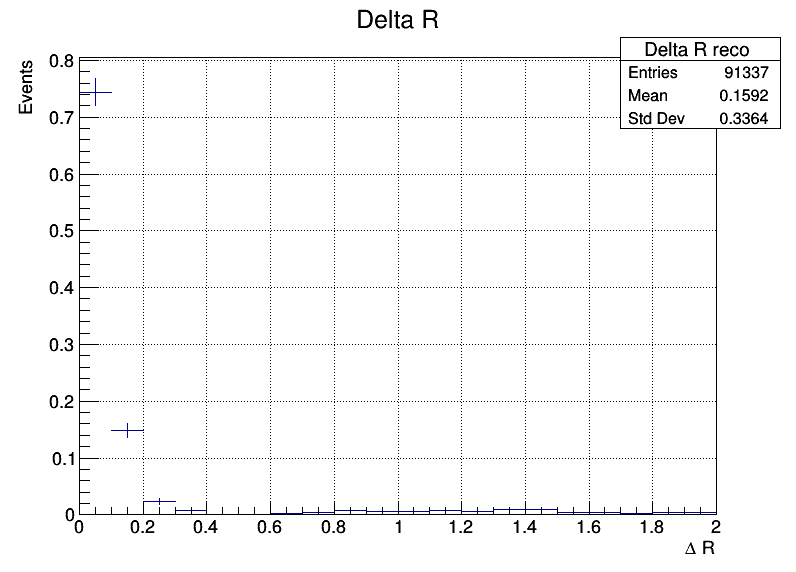

In [17]:
hist_DR_reco_truth.Scale(1./hist_DR_reco_truth.Integral());
hist_DR_reco_truth.DrawNormalized("");
canvas2.Draw();

<b>Excercise: 
6. Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets 
</b>

<b>Excercises: 
7. Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).
8. Investigate the Large-R jets: 
    (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets
    (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets
    (c) Compare all plots. How can you explain the differences?
    (d) Make the same comparisson for the jet mass.  

</b>

In [18]:
!pwd

/content
